# Utilities

> Utilities module

In [ ]:
#| default_exp utilities

In [ ]:
#| hide
from nbdev.showdoc import *
from fastcore.test import test_eq, test_fail

In [ ]:
#| export
from rdkit import Chem

In [ ]:
#| export
def canonicalize(smi:str, # input molecule
                 clear_stereo:bool=False, # if True, clears stereochemistry of the molecule (remove the @@)
                 ) -> str: # canonicalised molecule
    """This function returns the canonicalised smiles representation and has the option to clear stereochemistry"""
    mol = Chem.MolFromSmiles(smi)
    if clear_stereo:
        Chem.RemoveStereochemistry(mol)
    return Chem.MolToSmiles(mol, isomericSmiles=True)

In [ ]:
show_doc(canonicalize)

---

[source](https://github.com/panukorn17/breadth-first-fragmentation/blob/main/breadth_first_fragmentation/utilities.py#L12){target="_blank" style="float:right; font-size:smaller"}

### canonicalize

>      canonicalize (smi:str, clear_stereo:bool=False)

*This function returns the canonicalised smiles representation and has the option to clear stereochemistry*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| smi | str |  | input molecule |
| clear_stereo | bool | False | if True, clears stereochemistry of the molecule (remove the @@) |
| **Returns** | **str** |  | **canonicalised molecule** |

In [ ]:
canonicalize('C(CC)N(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')

'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

Canonicalizing an already canonicalized molecule

In [ ]:
canonicalize('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')

'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

Unit Tests

In [ ]:
test_eq(canonicalize('C(CC)N(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'), canonicalize('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'))
test_fail(canonicalize('CN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'), 'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')

In [ ]:
#| export
def mol_from_smiles(smi:str, # Input molecule in SMILES.
                    )->Chem.rdchem.Mol: # Output molecule.
    "This function converts a SMILES string to a molecule."
    return Chem.MolFromSmiles(Chem.CanonSmiles(smi))

In [ ]:
show_doc(mol_from_smiles)

---

[source](https://github.com/panukorn17/breadth-first-fragmentation/blob/main/breadth_first_fragmentation/utilities.py#L22){target="_blank" style="float:right; font-size:smaller"}

### mol_from_smiles

>      mol_from_smiles (smi:str)

*This function converts a SMILES string to a molecule.*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| smi | str | Input molecule in SMILES. |
| **Returns** | **Mol** | **Output molecule.** |

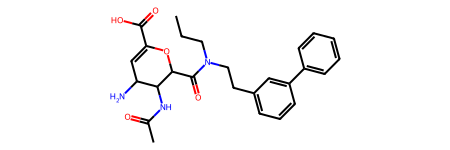

In [ ]:
mol_from_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')

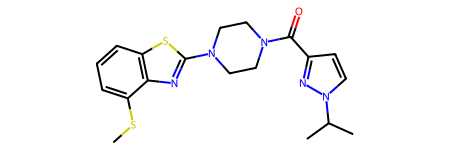

In [ ]:
mol_from_smiles('CSc1cccc2sc(N3CCN(C(=O)c4ccn(C(C)C)n4)CC3)nc12')

In [ ]:
#| export
def mol_to_smiles(mol:Chem.rdchem.Mol, # molecule to convert into SMILES string
                  rootedAtAtom:int=None, # SMILES string rooted at the input atom
                  ) -> str: # canonicalized SMILES string
    """This function converts a molecule to a SMILES string."""
    if rootedAtAtom:
        return Chem.MolToSmiles(Chem.MolFromSmiles(canonicalize(Chem.MolToSmiles(mol))), rootedAtAtom=rootedAtAtom)
    else:
        return canonicalize(Chem.MolToSmiles(mol))
    

In [ ]:
show_doc(mol_to_smiles)

---

[source](https://github.com/panukorn17/breadth-first-fragmentation/blob/main/breadth_first_fragmentation/utilities.py#L28){target="_blank" style="float:right; font-size:smaller"}

### mol_to_smiles

>      mol_to_smiles (mol:rdkit.Chem.rdchem.Mol, rootedAtAtom:int=None)

*This function converts a molecule to a SMILES string.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| mol | Mol |  | molecule to convert into SMILES string |
| rootedAtAtom | int | None | SMILES string rooted at the input atom |
| **Returns** | **str** |  | **canonicalized SMILES string** |

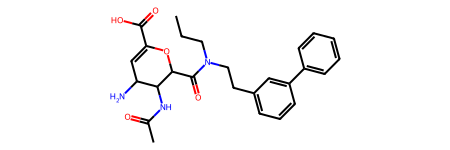

In [ ]:
mol = mol_from_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
mol

In [ ]:
mol_to_smiles(mol)

'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

In [ ]:
mol_to_smiles(mol, rootedAtAtom=3)

'N(CCC)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

Unit Tests

In [ ]:
mol = mol_from_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
mol_2 = mol_from_smiles('C(CC)N(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
test_eq(mol_to_smiles(mol), 'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
test_eq(mol_to_smiles(mol, rootedAtAtom=3), 'N(CCC)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
test_eq(mol_to_smiles(mol), mol_to_smiles(mol_2))

In [ ]:
#| export
def root_smiles(smi:str, # Input molecule in SMILES
                rootedAtAtom:int, # SMILES string rooted at the input atom
                )->str:
    'Root molecule in smiles format at a defined atom'
    return Chem.MolToSmiles(mol_from_smiles(smi),rootedAtAtom = rootedAtAtom)

In [ ]:
show_doc(root_smiles)

---

[source](https://github.com/panukorn17/breadth-first-fragmentation/blob/main/breadth_first_fragmentation/utilities.py#L39){target="_blank" style="float:right; font-size:smaller"}

### root_smiles

>      root_smiles (smi:str, rootedAtAtom:int)

*Root molecule in smiles format at a defined atom*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| smi | str | Input molecule in SMILES |
| rootedAtAtom | int | SMILES string rooted at the input atom |
| **Returns** | **str** |  |

In [ ]:
root_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', rootedAtAtom=3)

'N(CCC)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

In [ ]:
root_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', rootedAtAtom=0)

'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O'

Unit Tests

In [ ]:
test_eq(root_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', rootedAtAtom=0), 'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')
test_eq(root_smiles('CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', rootedAtAtom=3), 'N(CCC)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O')

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()